In [10]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

plt.rcParams.update({
    "font.size": 14,        # Base font size
    "axes.titlesize": 16,   # Title font size
    "axes.labelsize": 14,   # Axis label size
    "xtick.labelsize": 12,  # X tick labels
    "ytick.labelsize": 12,  # Y tick labels
    "legend.fontsize": 10,  # Legend font
    "figure.titlesize": 18  # Figure title
})

pc_savepath_lay_summary = r"C:\Users\User\Documents\Durham Work\Year 3\CompPhys\lay_summary.svg"

In [37]:
# -------------------------
# Parameters
# -------------------------
num_levels = 12
num_traced_paths = 3
num_samples = 50000

# Peg positions (now spaced in integers)
peg_x = [np.linspace(-i, i, i + 1) for i in range(num_levels)]
peg_y = [-i for i in range(num_levels)]

# -------------------------
# Generate traced paths
# -------------------------
choices = np.random.choice([-1, 1], size=(num_traced_paths, num_levels))
ball_paths = np.cumsum(choices, axis=1)
ball_paths = np.hstack([np.zeros((num_traced_paths, 1)), ball_paths])

# -------------------------
# Generate smooth distribution
# -------------------------
all_choices = np.random.choice([-1, 1], size=(num_samples, num_levels))
final_positions = np.sum(all_choices, axis=1)

# Gaussian approximation
x_vals = np.linspace(-num_levels, num_levels, 400)
sigma = np.sqrt(num_levels)
gaussian = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x_vals ** 2) / (2 * sigma ** 2))

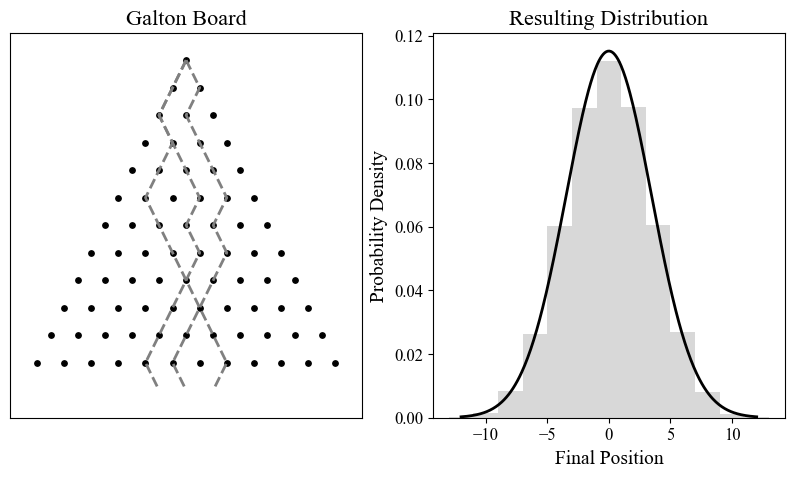

In [38]:
# -------------------------
# Set up figure
# -------------------------
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
dist_ax = fig.add_subplot(122)

# -------------------------
# Left Panel: Galton Board
# -------------------------
ax.set_xlim(-num_levels - 1, num_levels + 1)
ax.set_ylim(-num_levels - 1, 1)
ax.set_title("Galton Board")

# Plot pegs
for i in range(num_levels):
    ax.scatter(peg_x[i],
               np.full_like(peg_x[i], peg_y[i]),
               color="black", s=15)

# Plot traced paths
for i in range(num_traced_paths):
    y_vals = np.linspace(0, -num_levels, num_levels + 1)
    ax.plot(ball_paths[i], y_vals,
            linestyle="--", linewidth=2, color = "grey")

ax.set_xticks([])
ax.set_yticks([])

# -------------------------
# Right Panel: Distribution
# -------------------------
dist_ax.hist(final_positions,
             bins=np.arange(-num_levels - 1, num_levels + 2, 2),
             density=True,
             alpha=0.3,
             color = "grey")

dist_ax.plot(x_vals, gaussian, linewidth=2, color = "black")

dist_ax.set_title("Resulting Distribution")
dist_ax.set_xlabel("Final Position")
dist_ax.set_ylabel("Probability Density")

plt.savefig(pc_savepath_lay_summary, bbox_inches="tight")
plt.show()
